In [7]:
import scipy.io as sio
import matplotlib.pyplot as plt
from matplotlib import cm as cm
import numpy as np
import random as rand
from tqdm import tqdm_notebook as tqdm

print('Loading network data ...')

mat = sio.loadmat('Algorithm_output/data_python_48.mat') 

A_norm_max_inh = mat['A_norm_max_inh'].astype(float)

W = A_norm_max_inh
#W = np.abs(A_norm_max_inh)

N = len(W)
V = np.load('Connectome/V_weights.npy').flatten()

global time
time = 500
global neuron_chosen 
neuron_chosen = 12 #12

seed = 2000
np.random.seed(seed)
rand.seed(seed)

print('		Done! \n')

def simulation(time,V,W,inputt):
    X0 = np.random.rand(N) * 2 -1
    X = np.zeros([N,time+1])
    X[:,0] = X0
    for t in range(0,time):
        X[:,t+1] = np.tanh(V * inputt[t] + np.dot(W,X[:,t]))
    return X
        
def plot(X,inputt):
    fig2 = plt.figure(figsize=(15,10),dpi=300)
    fig2.patch.set_facecolor('xkcd:white')

    ax4 = plt.subplot2grid((10,1), (0,0), colspan=1, rowspan=1)
    cax4 = plt.xlim(0,time)
    fig2.text(0.5,0.9,'Input',color='black',fontsize=25,ha="center", va="bottom")

    ax4.set_facecolor('xkcd:white')
    ax4.tick_params(axis=('x'), colors='white')
    ax4.tick_params(axis=('y'), colors='white')
    ax4.set_yticklabels([])
    ax4.set_xticklabels([])

    for spine in ax4.spines.values():
        spine.set_edgecolor('white')

    plt.plot(np.arange(0,time),inputt,color='black')
    #lg = plt.legend(fontsize=18)

    ax6 = plt.subplot2grid((10,1), (2,0), colspan=1, rowspan=2)
    cax6 = plt.xlim(0,time)
    fig2.text(0.5,0.75,'Neuron '+str(neuron_chosen),color='black',fontsize=25,ha="center", va="bottom")
    ax6.set_facecolor('xkcd:white')
    ax6.tick_params(axis=('x'), colors='black')
    ax6.tick_params(axis=('y'), colors='black')
    plt.plot(np.reshape(np.arange(0,time),(time,1)),np.transpose(X[neuron_chosen,:-1]),color='black',linewidth=2)
    plt.xlabel('Time',fontsize=25)
    ax6.xaxis.label.set_color('black')
    ax6.tick_params(labelsize=15)
    plt.ylim(-1,1)

    ax6.spines['top'].set_color('white')
    ax6.spines['right'].set_color('white')
    ax6.spines['bottom'].set_color('white')
    ax6.spines['left'].set_color('white')

    ax5 = plt.subplot2grid((10,1), (5,0), colspan=1, rowspan=6)
    cax5 = plt.imshow(X,cmap='jet',aspect='auto')
    color_bar = plt.colorbar(orientation='horizontal',drawedges=False)
    color_bar.outline.set_edgecolor('white')
    color_bar.ax.tick_params(labelsize=15,color='black')
    cbytick_obj = plt.getp(color_bar.ax.axes, 'xticklabels')
    plt.setp(cbytick_obj, color='black')
    plt.clim(-1,1)
    ax5.set_yticklabels([])
    ax5.set_facecolor('xkcd:white')
    ax5.tick_params(axis=('x'), colors='black')
    ax5.tick_params(axis=('y'), colors='black')
    plt.ylabel('Neurons',fontsize=25)
    ax5.xaxis.label.set_color('black')
    ax5.yaxis.label.set_color('black')
    ax5.tick_params(color='white',labelsize=15)

    for spine in ax5.spines.values():
        spine.set_edgecolor('white')
        
def random_inhibition(A,n):
    newA = np.abs(np.copy(A))
    inhi_pos = rand.sample(range(0,len(A)), n)
    for i in inhi_pos:
        newA[i,:] = -newA[i,:]
    return newA, inhi_pos
    
def check_inhibition(A):
    sumA = np.sum(A,1)
    return sum(sumA<0)

Loading network data ...
		Done! 



Simulation without input ...
		Done! 



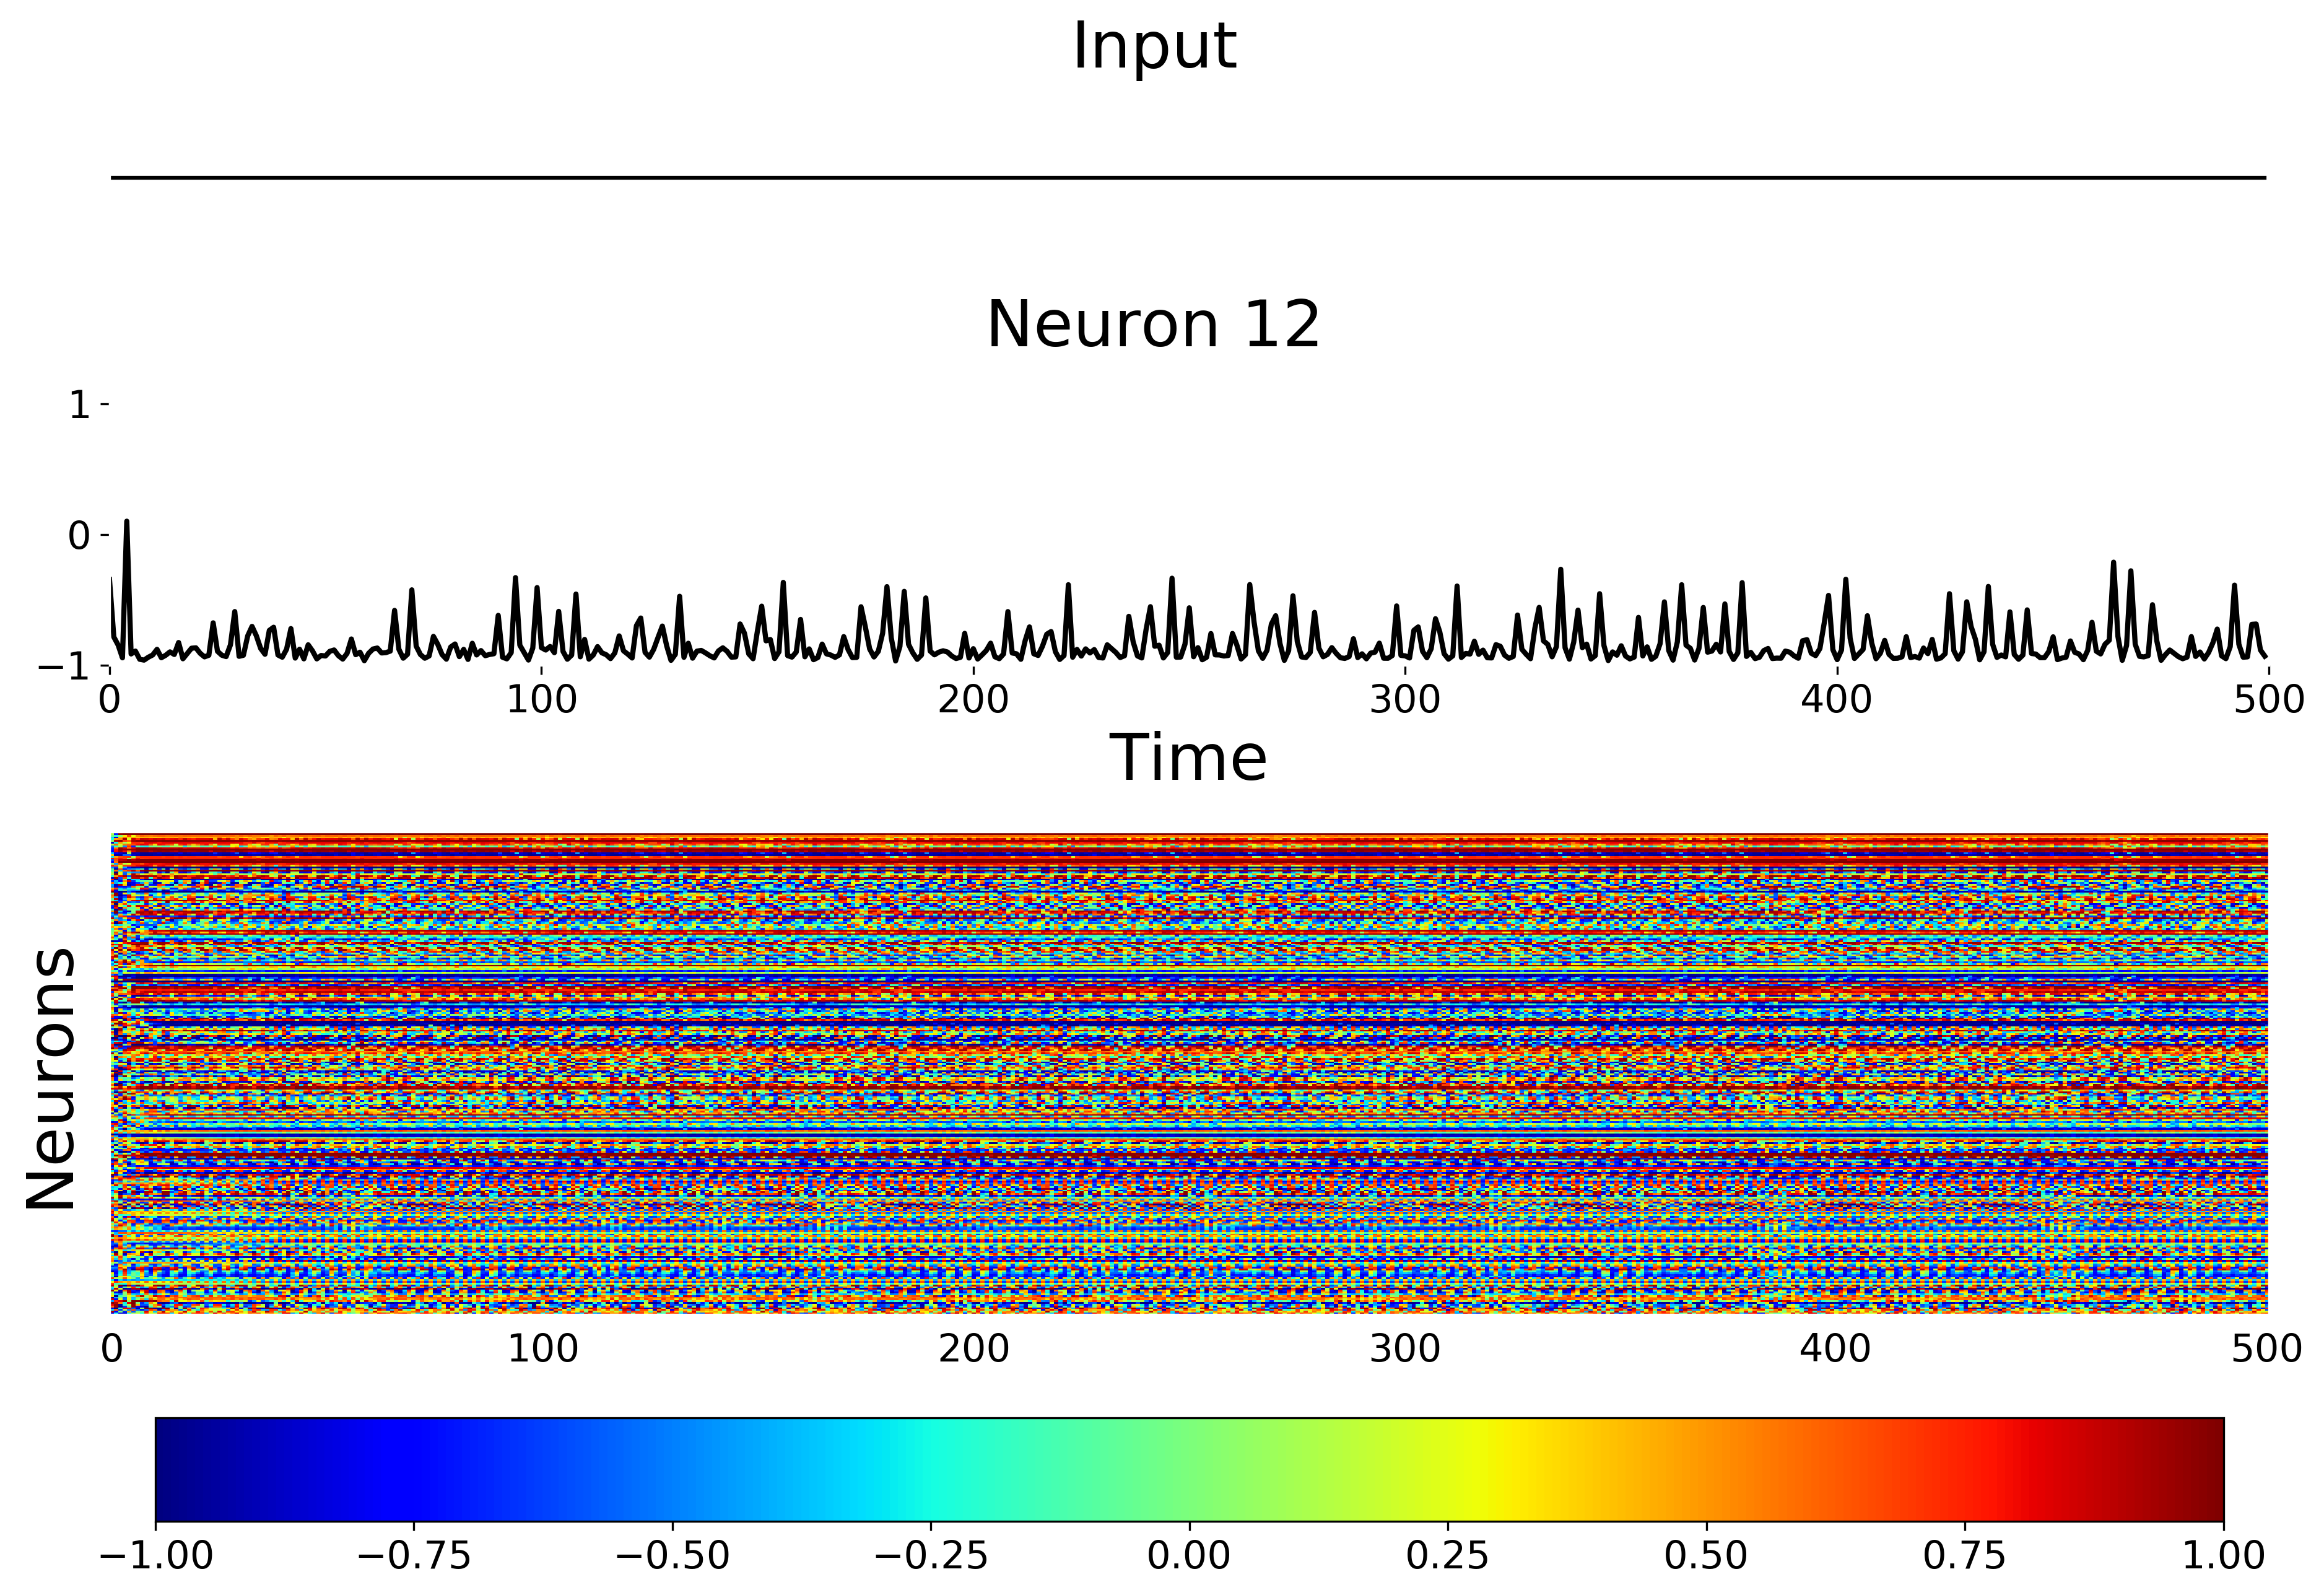

In [8]:
print('Simulation without input ...')

input_cte = np.zeros(time)

out = simulation(time,V,W,input_cte)

plot(out,input_cte)

print('		Done! \n')

Simulation with constant input ...
		Done! 



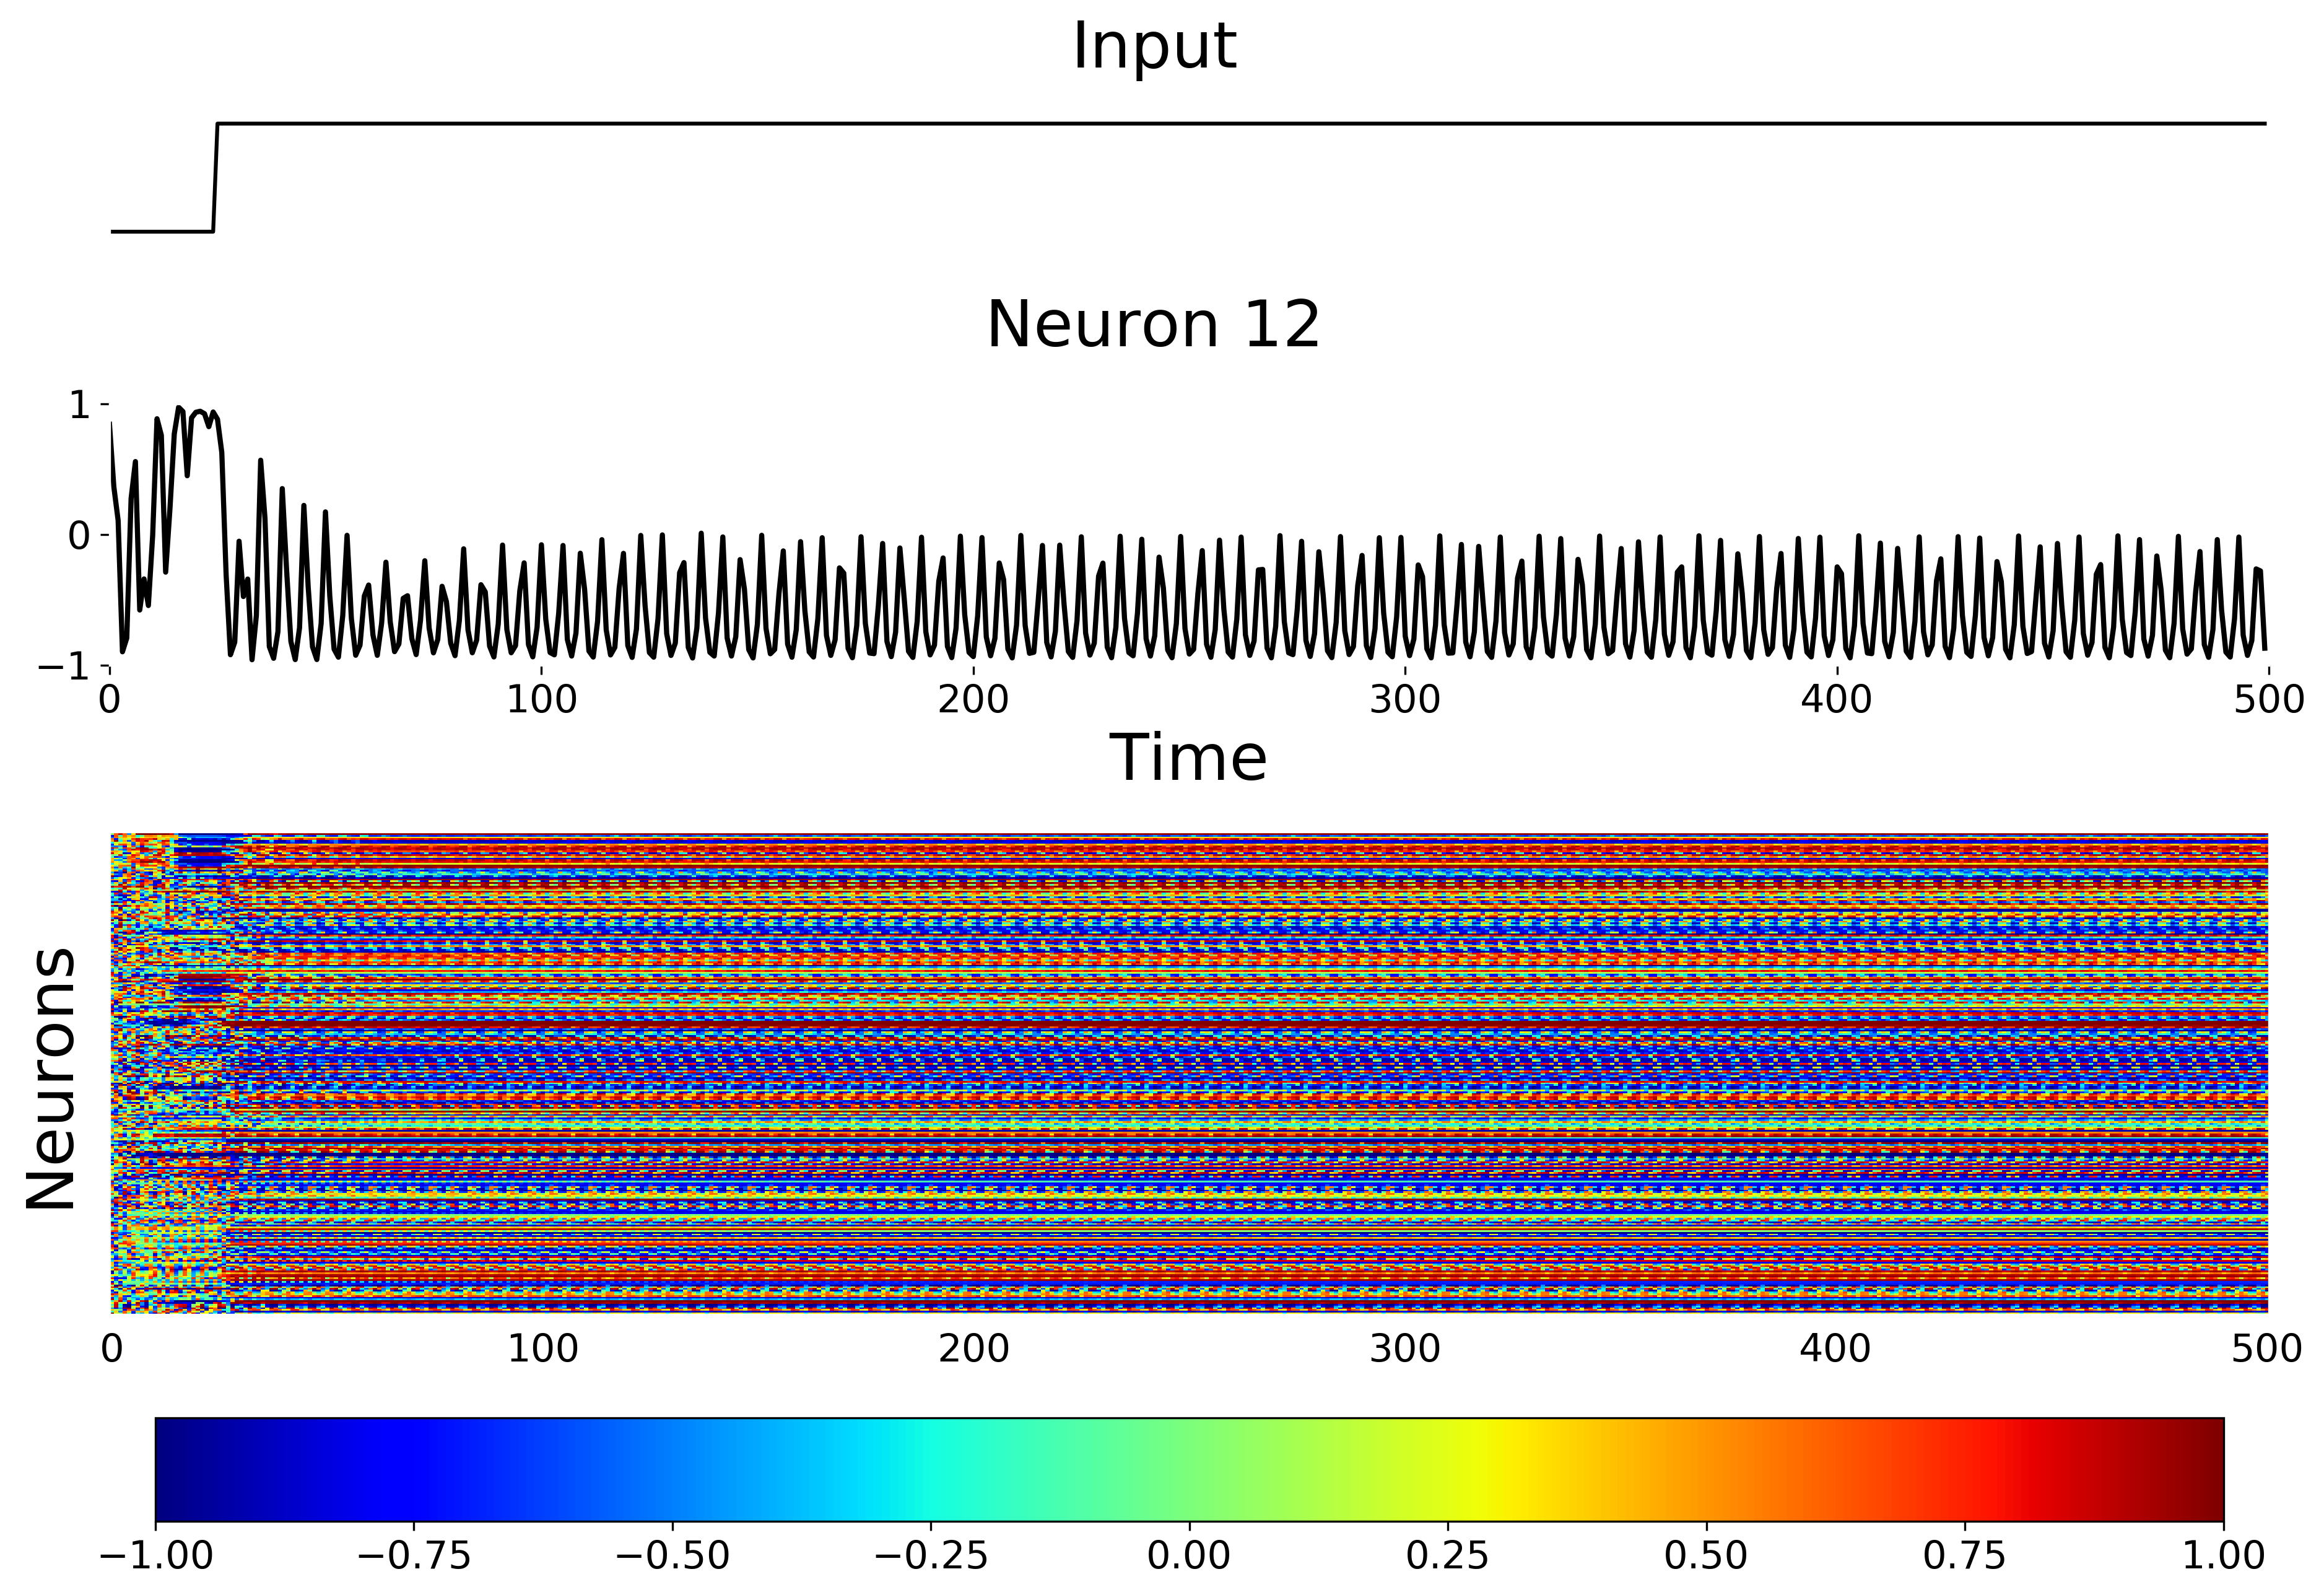

In [9]:
print('Simulation with constant input ...')

t0 = 25
input_cte = np.zeros(t0)
input_cte = np.append(input_cte,np.ones(time-t0))

out = simulation(time,V,W,input_cte)

plot(out,input_cte)

print('		Done! \n')

Simulation with constant pulses ...
		Done! 



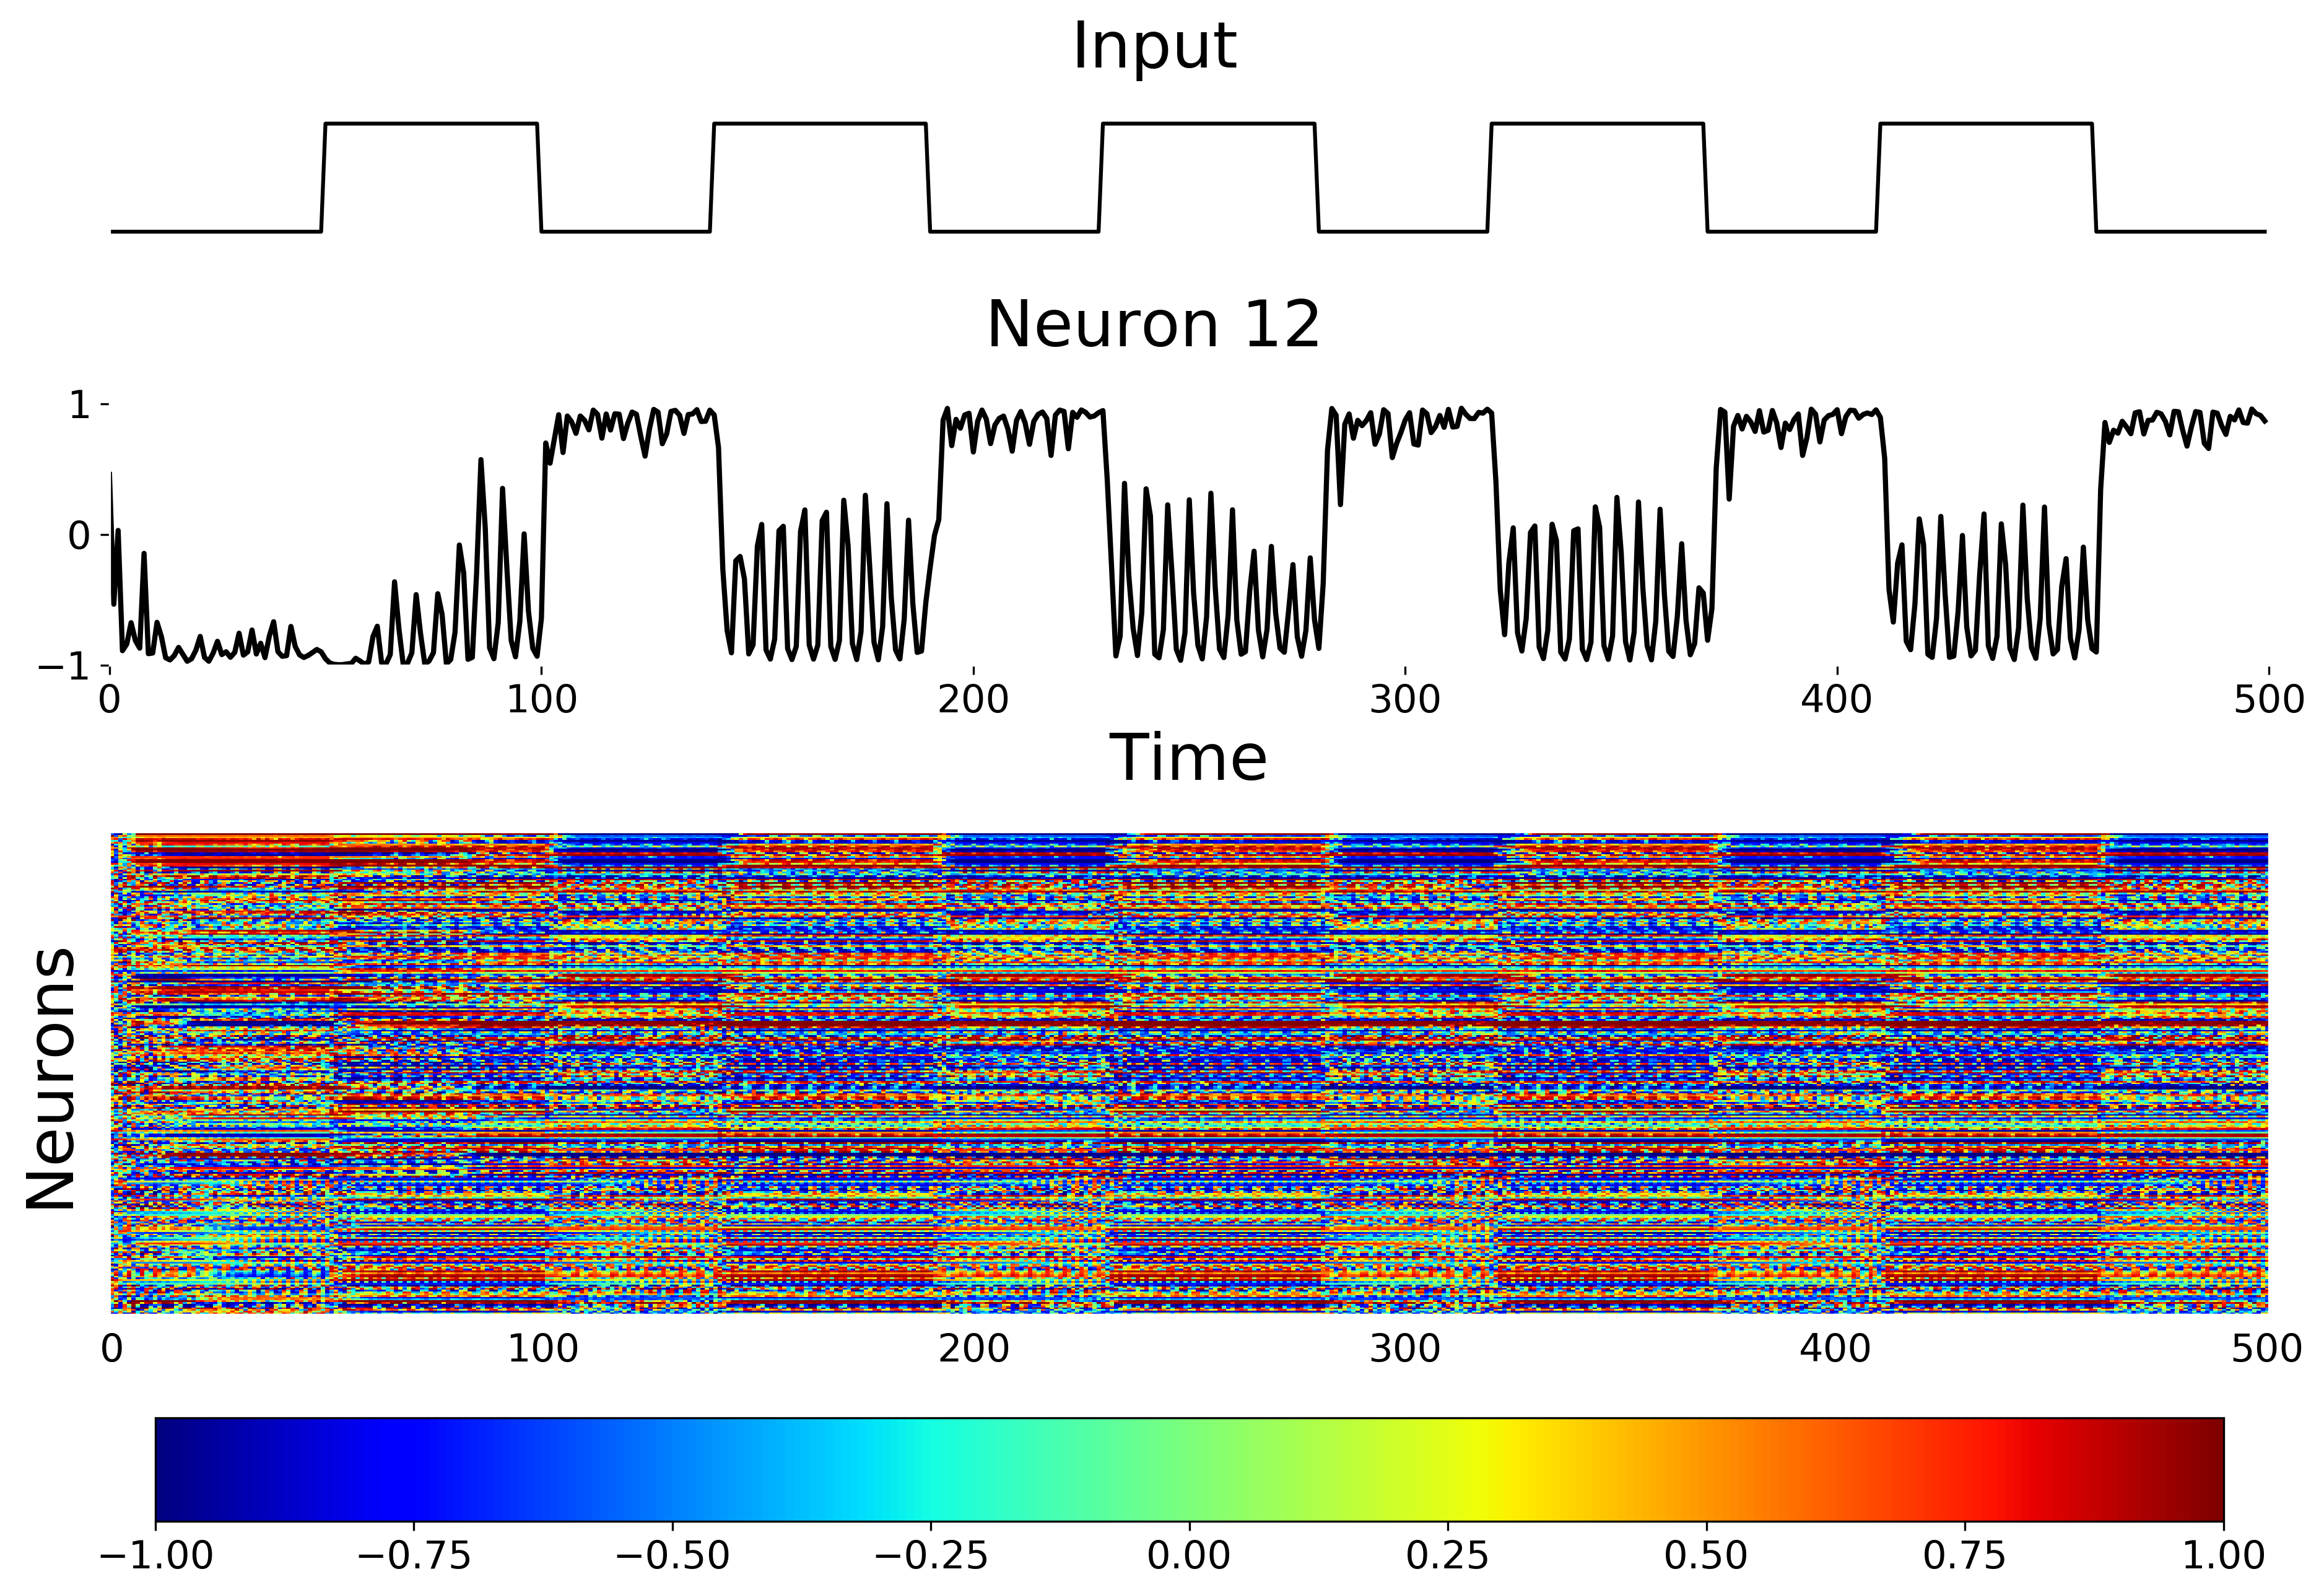

In [10]:
print('Simulation with constant pulses ...')

duration = 50
pulse = np.ones(duration)
t0 = 50
t = 40

input_pulses = np.zeros(t0)
while len(input_pulses)<time:
    input_pulses = np.append(input_pulses,pulse)
    input_pulses = np.append(input_pulses,np.zeros(t))
    
if len(input_pulses)>time:
    aux = time-len(input_pulses)
    input_pulses = input_pulses[:aux]
elif len(input_pulses)<time:
    aux = time-len(input_pulses)
    input_pulses = np.append(input_pulses,np.zeros(aux))

out = simulation(time,V,W,input_pulses)

plot(out,input_pulses)

print('		Done! \n')

Simulation with irregular pulses ...
		Done! 



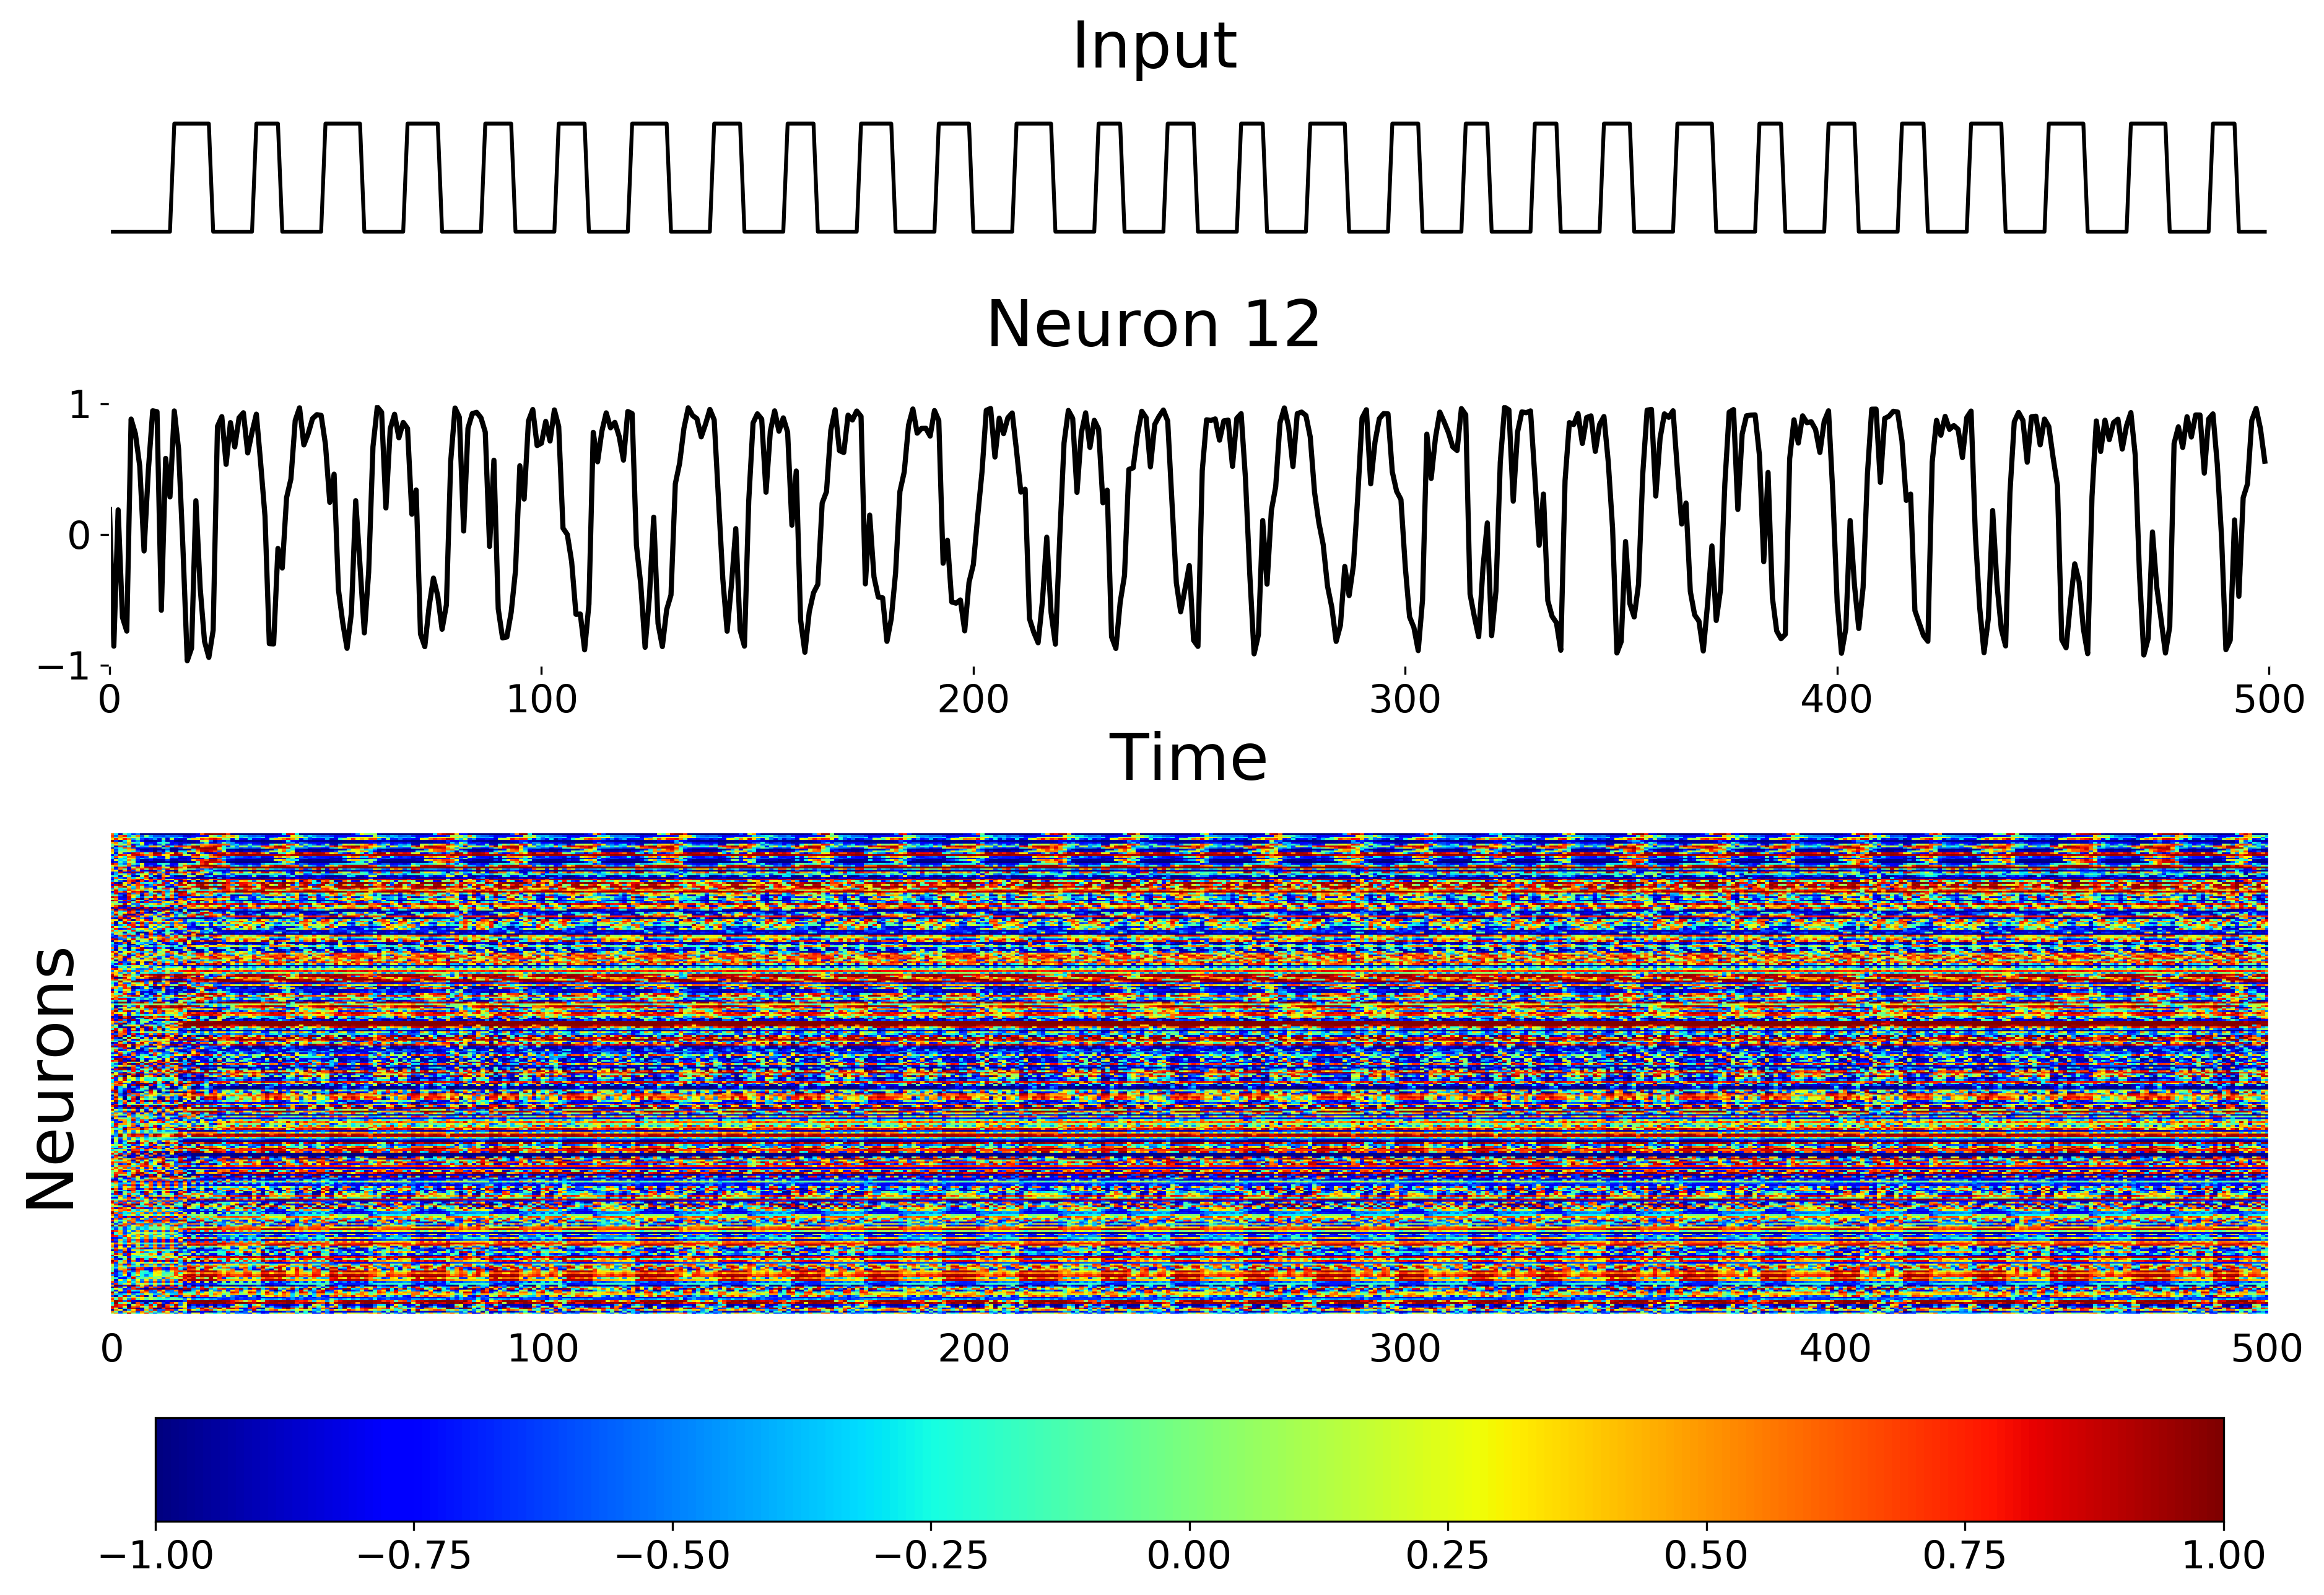

In [11]:
print('Simulation with irregular pulses ...')

duration = 8 #10
t0 = 15
t = 10 #5, 8
std = int(np.round(0.3*duration)) #3

input_pulses = np.zeros(t0)
pulseirr_number = np.zeros(t0)
number = 1
while len(input_pulses)<time:
    #input_pulses = np.append(input_pulses,np.ones(duration)) #+ random.randrange(-3, 4, 1) ))
    suplementary = rand.randrange(-std, std, 1)
    input_pulses = np.append(input_pulses,np.ones(duration+suplementary))
    input_pulses = np.append(input_pulses,np.zeros(t))
    pulseirr_number = np.append(pulseirr_number,np.zeros(duration+suplementary))
    pulseirr_number = np.append(pulseirr_number,number*np.ones(t))
    number = number + 1
    
if len(input_pulses)>time:
    aux = time-len(input_pulses)
    input_pulses = input_pulses[:aux]
elif len(input_pulses)<time:
    aux = time-len(input_pulses)
    input_pulses = np.append(input_pulses,np.zeros(aux))
    
out = simulation(time,V,W,input_pulses)

plot(out,input_pulses)

print('		Done! \n')

#np.savetxt("NeuronDynamics.csv", out, delimiter=",")
#np.savetxt("Input.csv", input_pulses, delimiter=",")